In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In my exploratory data analysis of the Spotify hit predictor dataset, I identified several categories in which songs that made the Billboard top 100 charts differed from those that did not. Using bootstrap statistics we will examine the details of these differences. 

In [2]:
datasets = ['dataset-of-60s.csv', 'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv', 'dataset-of-00s.csv', 'dataset-of-10s.csv']
dflist = []

for dataset in datasets:
    df = pd.read_csv(dataset)
    dflist.append(df)
    
df_concat = pd.concat(dflist)
df_concat.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


### Danceability

In [3]:
dfhit = df.loc[df['target'] == 1]
dfflop = df.loc[df['target'] == 0]

In [4]:
np.random.seed(42)
n_reps = 10000

bs_hit_dance = np.empty(n_reps)
bs_flop_dance = np.empty(n_reps)

def draw_reps(bs, size, array):
    for i in range(size):
        bs_reps = np.random.choice(bs, len(bs))
        array[i] = np.mean(bs_reps)

draw_reps(dfhit.danceability, n_reps, bs_hit_dance)
draw_reps(dfflop.danceability, n_reps, bs_flop_dance)

In [5]:
diff = bs_hit_dance - bs_flop_dance
confidence = np.percentile(diff, [2.5, 97.45])
confidence

array([0.13814974, 0.15568123])

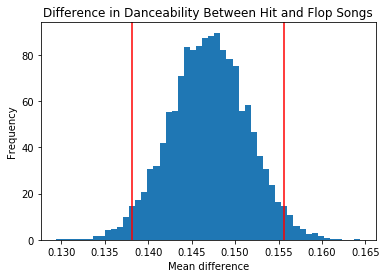

In [6]:


_ = plt.hist(diff, bins=50, density=True)
_ = plt.title('Difference in Danceability Between Hit and Flop Songs')
_ = plt.xlabel('Mean difference')
_ = plt.ylabel('Frequency')
_ = plt.axvline(confidence[0], color='r')
_ = plt.axvline(confidence[1], color='r')



The danceability scores for hit songs have a higher mean danceability score by between 0.13 and 0.15

### Loudness

In [7]:
bs_hit_loudness = np.empty(n_reps)
bs_flop_loudness = np.empty(n_reps)

draw_reps(dfhit.loudness, n_reps, bs_hit_loudness)
draw_reps(dfflop.loudness, n_reps, bs_flop_loudness)

In [8]:
diff = bs_hit_loudness - bs_flop_loudness
confidence = np.percentile(diff, [2.5, 97.45])
confidence

array([3.18411236, 3.66625771])

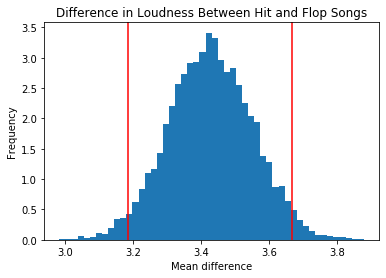

In [9]:

_ = plt.hist(diff, bins=50, density=True)
_ = plt.title('Difference in Loudness Between Hit and Flop Songs')
_ = plt.xlabel('Mean difference')
_ = plt.ylabel('Frequency')
_ = plt.axvline(confidence[0], color='r')
_ = plt.axvline(confidence[1], color='r')

Hit songs have a difference in loudness between 3.1 and 3.6 decibels. 

### Instrumentalness

In [10]:
bs_hit_instrumentalness = np.empty(n_reps)
bs_flop_instrumentalness = np.empty(n_reps)

draw_reps(dfhit.instrumentalness, n_reps, bs_hit_instrumentalness)
draw_reps(dfflop.instrumentalness, n_reps, bs_flop_instrumentalness)

In [11]:
diff = bs_hit_instrumentalness - bs_flop_instrumentalness
confidence = np.percentile(diff, [2.5, 97.45])
confidence

array([-0.33195224, -0.30495183])

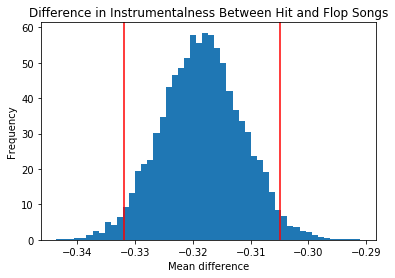

In [12]:

_ = plt.hist(diff, bins=50, density=True)
_ = plt.title('Difference in Instrumentalness Between Hit and Flop Songs')
_ = plt.xlabel('Mean difference')
_ = plt.ylabel('Frequency')
_ = plt.axvline(confidence[0], color='r')
_ = plt.axvline(confidence[1], color='r')

The difference in instrumentalness is between -0.33 and -0.30. This indicatest that a lower intstrumentalness rating is desirable for hit songs. 

### Acousticness

In [13]:
bs_hit_acousticness = np.empty(n_reps)
bs_flop_acousticness = np.empty(n_reps)

draw_reps(dfhit.acousticness, n_reps, bs_hit_acousticness)
draw_reps(dfflop.acousticness, n_reps, bs_flop_acousticness)

In [14]:
diff = bs_hit_acousticness - bs_flop_acousticness
confidence = np.percentile(diff, [2.5, 97.45])
confidence

array([-0.12369193, -0.09531191])

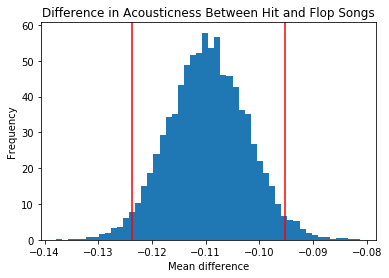

In [15]:

_ = plt.hist(diff, bins=50, density=True)
_ = plt.title('Difference in Acousticness Between Hit and Flop Songs')
_ = plt.xlabel('Mean difference')
_ = plt.ylabel('Frequency')
_ = plt.axvline(confidence[0], color='r')
_ = plt.axvline(confidence[1], color='r')

The difference in acousticness is between -0.12 and -0.09. Similar to instrumentalness, hit songs have a lower acousticness rating. 

### Chorus Hit

In [18]:
bs_hit_chorus_hit = np.empty(n_reps)
bs_flop_chorus_hit = np.empty(n_reps)

draw_reps(dfhit.chorus_hit, n_reps, bs_hit_chorus_hit)
draw_reps(dfflop.chorus_hit, n_reps, bs_flop_chorus_hit)

In [19]:
diff = bs_hit_chorus_hit - bs_flop_chorus_hit
confidence = np.percentile(diff, [2.5, 97.45])
confidence

array([-4.31792371, -2.38183165])

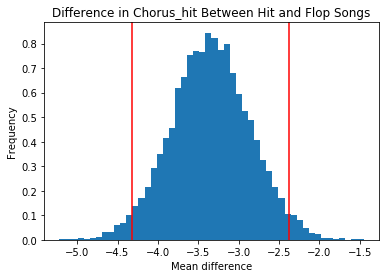

In [20]:
_ = plt.hist(diff, bins=50, density=True)
_ = plt.title('Difference in Chorus_hit Between Hit and Flop Songs')
_ = plt.xlabel('Mean difference')
_ = plt.ylabel('Frequency')
_ = plt.axvline(confidence[0], color='r')
_ = plt.axvline(confidence[1], color='r')

In hit songs, the chorus hits between -4.3 and -2.3 times faster. The EDA showed that in hit songs the chorus comes in earlier in the song. 

### Valence

In [21]:
bs_hit_valence = np.empty(n_reps)
bs_flop_valence = np.empty(n_reps)

draw_reps(dfhit.valence, n_reps, bs_hit_valence)
draw_reps(dfflop.valence, n_reps, bs_flop_valence)

In [22]:
diff = bs_hit_valence - bs_flop_valence
confidence = np.percentile(diff, [2.5, 97.45])
confidence

array([0.08828903, 0.11194014])

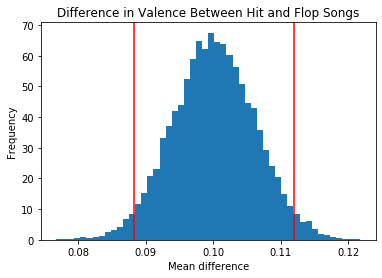

In [23]:
_ = plt.hist(diff, bins=50, density=True)
_ = plt.title('Difference in Valence Between Hit and Flop Songs')
_ = plt.xlabel('Mean difference')
_ = plt.ylabel('Frequency')
_ = plt.axvline(confidence[0], color='r')
_ = plt.axvline(confidence[1], color='r')

In hit songs, the valence is between .08 and .11 higher. 

### Number of Sections

In [24]:
bs_hit_sections = np.empty(n_reps)
bs_flop_sections = np.empty(n_reps)

draw_reps(dfhit.sections, n_reps, bs_hit_sections)
draw_reps(dfflop.sections, n_reps, bs_flop_sections)

In [26]:
diff = bs_hit_sections - bs_flop_sections
confidence = np.percentile(diff, [2.5, 97.45])
confidence

array([-1.04376368, -0.67270225])

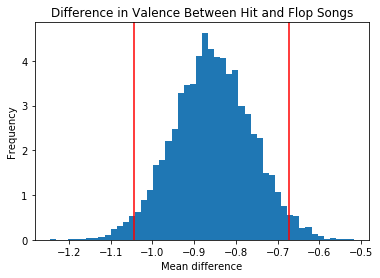

In [27]:
_ = plt.hist(diff, bins=50, density=True)
_ = plt.title('Difference in Sections Between Hit and Flop Songs')
_ = plt.xlabel('Mean difference')
_ = plt.ylabel('Frequency')
_ = plt.axvline(confidence[0], color='r')
_ = plt.axvline(confidence[1], color='r')

Hit songs have between 1 and .6 less sections than non-hit songs. 